In [15]:
import matplotlib.pyplot as plt
from collections import defaultdict
plt.style.use('tableau-colorblind10')

In [16]:
with open("secrets.txt", "r") as f:
     words = [line.strip() for line in f.readlines()]
lcounts = defaultdict(int)
total_letters = 0
for word in words:
    total_letters += len(word)
    for c in word:
        lcounts[c] += 1

In [17]:
proportions_sorted = list(sorted([(letter, count/total_letters) for letter, count in lcounts.items()],
                                 key=lambda p: p[1], reverse=True))

In [18]:
proportions_sorted[:10]

[('e', 0.10652267818574514),
 ('a', 0.08457883369330453),
 ('r', 0.07766738660907127),
 ('o', 0.0651403887688985),
 ('t', 0.06298056155507559),
 ('l', 0.06211663066954644),
 ('i', 0.057969762419006476),
 ('s', 0.057796976241900645),
 ('n', 0.04967602591792657),
 ('c', 0.04120950323974082)]

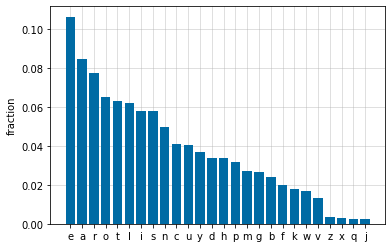

In [22]:
xs = [0.5+x for x in range(len(proportions_sorted))]
plt.bar(xs,
        [p for l, p in proportions_sorted],
        tick_label=[l for l, p in proportions_sorted],
        zorder=3)
plt.grid("--", alpha=0.5, zorder=0)
plt.ylabel("fraction")
plt.savefig("/tmp/letterfreq.png")

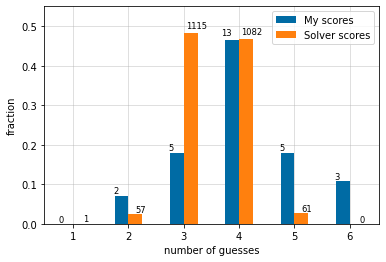

In [60]:
my_scores = [(1, 0), (2, 2), (3, 5), (4, 13), (5, 5), (6, 3)]
solver_scores = [(1, 1), (2, 57), (3, 1115), (4, 1082), (5, 61), (6, 0)]
def plot_scores(ss, offset, label):
    total = sum(c for g, c in ss)
    bar = plt.bar([x+offset for x in range(len(ss))],
                  [c/total for g, c in ss],
                  tick_label=None,
                  label=label,
                  width=0.25,
                  zorder=3)
    for rect, count in zip(bar, [c for g, c in ss]):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2 + offset/1.25,
                 height*1.015,
                 f'{count}',
                 ha='center',
                 va='bottom',
                 fontdict=dict(fontsize='small'))

plot_scores(my_scores, -0.125, "My scores")
plot_scores(solver_scores, 0.125, "Solver scores")
plt.xticks(
    list(range(len(my_scores))),
    labels=[g for g, c in my_scores])
plt.ylabel("fraction")
plt.xlabel("number of guesses")
plt.grid("--", alpha=0.5, zorder=0)
plt.ylim(top=0.55)
plt.legend()
plt.savefig("/tmp/me-vs-solver.png")